##Approach Taken

- Built a prophet model
  - This has the advantage of being flexible and deals well inherently will missing values
- Built forecasts for three different scenarios
  - For all vendors
  - for all vendors except vendor37
  - For only vendor37

#### My conclusion

- Even if vendor37 did not close down, revenues were declining month on month overall
- The closure of vendor37 had very little impact on projections for month 5 and month 6 as they were further out in time.
- This is observable from the fact that the forecasts for all vendors and that for all except vendor37 converged over the outer months
- It would not make much improvement to revenue if vendor37 was reopened as it would not arrest the decline in any significant way.

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/DE_assignment')
print(os.getcwd())
import datetime as dt
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
pd.options.mode.chained_assignment = None

from prophet import Prophet


/content/drive/MyDrive/Colab Notebooks/DE_assignment


In [ ]:
df=pd.read_csv('working_data.csv')

df['date']=pd.to_datetime(df['date'])

date_frame=df[['date','month','day','period']].drop_duplicates(keep='last').rename(columns={'date':'ds'})



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmv5pqdb8/r7f_3wbg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmv5pqdb8/8q5ofd6o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16611', 'data', 'file=/tmp/tmpmv5pqdb8/r7f_3wbg.json', 'init=/tmp/tmpmv5pqdb8/8q5ofd6o.json', 'output', 'file=/tmp/tmpmv5pqdb8/prophet_modelhaqu3y87/prophet_model-20221010223421.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:34:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:34:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


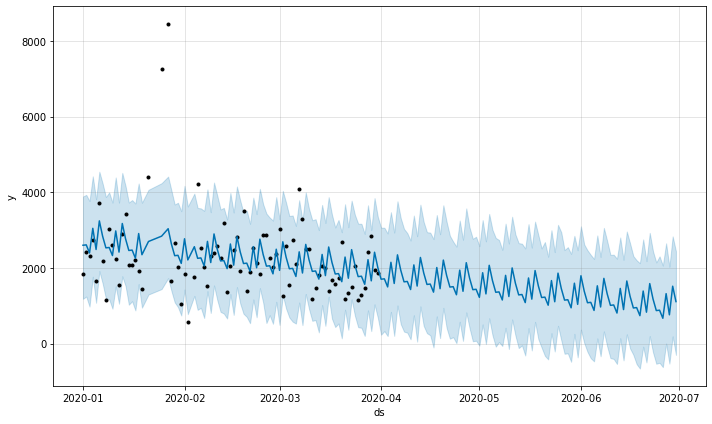

In [ ]:
###Forecasting for v37 only
##Prepping data

ts_v37_raw=df[df['vendor']=='vendor37']

ts_v37=ts_v37_raw.groupby(['date'])['revenue'].sum().reset_index()
ts_v37.rename(columns={'date':'ds','revenue':'y'},inplace=True)


m = Prophet()
m.fit(ts_v37)

future = m.make_future_dataframe(periods=91)
forecast = m.predict(future)
fig1 = m.plot(forecast)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmv5pqdb8/56njzaam.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmv5pqdb8/rwln5lda.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86183', 'data', 'file=/tmp/tmpmv5pqdb8/56njzaam.json', 'init=/tmp/tmpmv5pqdb8/rwln5lda.json', 'output', 'file=/tmp/tmpmv5pqdb8/prophet_modelrajow57a/prophet_model-20221010223422.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:34:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:34:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


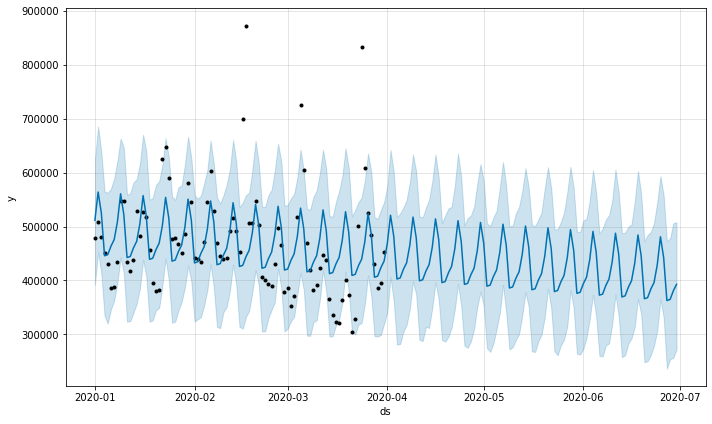

In [ ]:
ts_non_v37_raw=df[(df['vendor']!='vendor37') & (df['month']<4)]

ts_non_v37_raw=ts_non_v37_raw.groupby(['date'])['revenue'].sum().reset_index()
ts_non_v37_raw.rename(columns={'date':'ds','revenue':'y'},inplace=True)


m1 = Prophet()
m1.fit(ts_non_v37_raw)

future = m1.make_future_dataframe(periods=91)
forecast1 = m1.predict(future)
fig1 = m1.plot(forecast1)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmv5pqdb8/pyrmw9tc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmv5pqdb8/4ndu7k03.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45703', 'data', 'file=/tmp/tmpmv5pqdb8/pyrmw9tc.json', 'init=/tmp/tmpmv5pqdb8/4ndu7k03.json', 'output', 'file=/tmp/tmpmv5pqdb8/prophet_model2jgoy77m/prophet_model-20221010223425.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:34:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:34:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


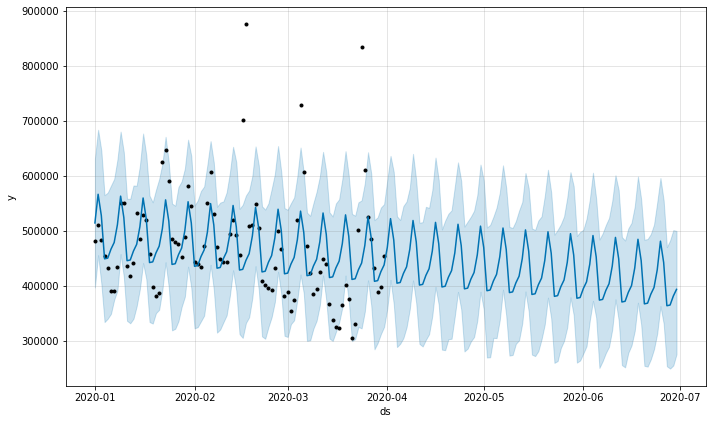

In [ ]:
ts_raw=df[(df['month']<4)]

ts_raw=ts_raw.groupby(['date'])['revenue'].sum().reset_index()
ts_raw.rename(columns={'date':'ds','revenue':'y'},inplace=True)


m2 = Prophet()
m2.fit(ts_raw)

future = m2.make_future_dataframe(periods=91)
forecast2 = m2.predict(future)
fig1 = m2.plot(forecast2)



In [ ]:
###Creating final datasets

f_v37=forecast[['ds','yhat','yhat_lower','yhat_upper']].rename(columns={'yhat':'y'}).reset_index(drop=True)
f_v37=pd.merge(f_v37,date_frame,on=['ds'],how='inner')
f_v37=f_v37[(f_v37['month'] > 3)]
f_v37['series']='vendor37'
f_v37['act_fcst']='forecast'


f_nv37=forecast1[['ds','yhat','yhat_lower','yhat_upper']].rename(columns={'yhat':'y'}).reset_index(drop=True)
f_nv37=pd.merge(f_nv37,date_frame,on=['ds'],how='inner')
f_nv37=f_nv37[(f_nv37['month'] > 3)]
f_nv37['series']='all except vendor37'
f_nv37['act_fcst']='forecast'


f_full=forecast2[['ds','yhat','yhat_lower','yhat_upper']].rename(columns={'yhat':'y'}).reset_index(drop=True)
f_full=pd.merge(f_full,date_frame,on=['ds'],how='inner')
f_full=f_full[(f_full['month'] > 3)]
f_full['series']='all'
f_full['act_fcst']='forecast'



###historical data
ts_v37['series']='vendor37'
ts_v37['act_fcst']='actual'
ts_v37=pd.merge(ts_v37,date_frame,on=['ds'],how='inner')


ts_non_v37_raw['series']='all except vendor37'
ts_non_v37_raw['act_fcst']='actual'
ts_non_v37_raw=pd.merge(ts_non_v37_raw,date_frame,on=['ds'],how='inner')


ts_raw['series']='all'
ts_raw['act_fcst']='actual'
ts_raw=pd.merge(ts_raw,date_frame,on=['ds'],how='inner')

final_forecast_df=pd.DataFrame()

final_forecast_df=final_forecast_df.append(ts_v37)
final_forecast_df=final_forecast_df.append(ts_non_v37_raw)
final_forecast_df=final_forecast_df.append(ts_raw)

final_forecast_df=final_forecast_df.append(f_v37)
final_forecast_df=final_forecast_df.append(f_nv37)
final_forecast_df=final_forecast_df.append(f_full)



monthly_results_df=final_forecast_df.groupby(['month','series','period','act_fcst'])['y'].sum().reset_index().rename(columns={'y':'revenue'})

final_forecast_df=final_forecast_df.rename(columns={'y':'revenue','ds':'date'})

final_forecast_df['revenue']=final_forecast_df['revenue'].round(2)

In [ ]:
###Plotting the charts
##Daily

##if vendor37 had not been closed down


all=go.Figure()

all.add_trace(
    go.Scatter(
        x=final_forecast_df[(final_forecast_df['series']=='all')]['date'],
        y=final_forecast_df[(final_forecast_df['series']=='all')]['revenue'],
        name='actuals',
        mode='lines'
    ))

all.add_trace(
    go.Scatter(
        x=final_forecast_df[(final_forecast_df['series']=='all')&(final_forecast_df['act_fcst']=='forecast')]['date'],
        y=final_forecast_df[(final_forecast_df['series']=='all')&(final_forecast_df['act_fcst']=='forecast')]['revenue'],
        name='forecast all vendors',
        
        mode='lines'
    ))

all.add_trace(
    go.Scatter(
        x=final_forecast_df[(final_forecast_df['series']=='all except vendor37')&(final_forecast_df['act_fcst']=='forecast')]['date'],
        y=final_forecast_df[(final_forecast_df['series']=='all except vendor37')&(final_forecast_df['act_fcst']=='forecast')]['revenue'],
        name='forecast all vendors except vendor 37',
        
        mode='markers'
    ))

all.update_layout(
    title="Forecasts for the two different series")



all.show()

print('from the above, we can see that there is not much discernible dofference in revenue between the two types of forecast.\nVendor37 had such a small contribution on a daily level the the forecasts were unaffected')

from the above, we can see that there is not much discernible dofference in revenue between the two types of forecast.
Vendor37 had such a small contribution on a daily level the the forecasts were unaffected


In [ ]:
diff1=final_forecast_df[['date','month','revenue','series','act_fcst']]
diff1a=diff1[(diff1['series']=='all')&(diff1['act_fcst']=='forecast')]


diff2=final_forecast_df[['date','month','revenue','series','act_fcst']]
diff2a=diff2[(diff2['series']=='all except vendor37')&(diff2['act_fcst']=='forecast')]

diff_table=pd.merge(diff1a,diff2a,on=['date','month','act_fcst'])
diff_table['diff_in_fcst']=diff_table['revenue_x']-diff_table['revenue_y']

diff_table

all2=go.Figure()

all2.add_trace(
    go.Scatter(
        x=diff_table['date'],
        y=diff_table['diff_in_fcst'],
        name='forecast_diff',
        mode='lines'
    ))
all2.update_layout(
    title="Difference in the forecasts over time")


all2.show()

print('\n\nas time period grows further out, the two forecasts converge')



as time period grows further out, the two forecasts converge


In [ ]:


fig = go.Figure(data=[
   
   go.Bar(name='forecast all', x=[4,5,6], y=monthly_results_df[(monthly_results_df['series']=='all')&(monthly_results_df['act_fcst']=='actual')]['revenue'],
           text=monthly_results_df[(monthly_results_df['series']=='all')&(monthly_results_df['act_fcst']=='forecast')]['revenue'].round(2)),
    go.Bar(name='forecast all except vendor 37', x=[4,5,6], y=monthly_results_df[(monthly_results_df['series']=='all except vendor37')&(monthly_results_df['act_fcst']=='actual')]['revenue'],
           text=monthly_results_df[(monthly_results_df['series']=='all except vendor37')&(monthly_results_df['act_fcst']=='forecast')]['revenue'].round(2)),
            
           ]
           )

fig.update_layout(
    title="Monthly roll up of the forecasts")


fig.show()

print('It can also be seen that at the monthly level the differences are very small')

It can also be seen that at the monthly level the differences are very small
